# Lead Scoring Case Study Project - Logistic regression

## Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

## Data


You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Variables Description

1. Prospect ID: A unique ID with which the customer is identified.

2. Lead Number: A lead number assigned to each lead procured.

3. Lead Origin: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

4. Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

5. Do Not Email : An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

6. Do Not Call: An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

7. Converted: The target variable. Indicates whether a lead has been successfully converted or not.

8. TotalVisits:The total number of visits made by the customer on the website.

9. Total Time Spent on Website: The total time spent by the customer on the website.

10. Page Views Per Visit: Average number of pages on the website viewed during the visits.

11. Last Activity: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

12. Country: The country of the customer.

13. Specialization: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

14. How did you hear about X Education: The source from which the customer heard about X Education.

15. What is your current occupation: Indicates whether the customer is a student, umemployed or employed.

16. What matters most to you in choosing this course: An option selected by the customer indicating what is their main motto behind doing this course.

17. Search: Indicating whether the customer had seen the ad in any of the listed items.

18. Magazine	

19. Newspaper Article	

20. X Education Forums	

21. Newspaper	

22. Digital Advertisement	

23. Through Recommendations: Indicates whether the customer came in through recommendations.

24. Receive More Updates About Our Courses: Indicates whether the customer chose to receive more updates about the courses.

25. Tags: Tags assigned to customers indicating the current status of the lead.

26. Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

27. Update me on Supply Chain Content: Indicates whether the customer wants updates on the Supply Chain Content.

28. Get updates on DM Content: Indicates whether the customer wants updates on the DM Content.

29. Lead Profile: A lead level assigned to each customer based on their profile.

30. City: The city of the customer.

31. Asymmetrique Activity Index: An index and score assigned to each customer based on their activity and their profile

32. Asymmetrique Profile Index	

33. Asymmetrique Activity Score	

34. Asymmetrique Profile Score	

35. I agree to pay the amount through cheque: Indicates whether the customer has agreed to pay the amount through cheque or not.

36. A free copy of Mastering The Interview: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

37. Last Notable Activity: The last notable acitivity performed by the student.

## Goals of the case study 

1. To build a logistics regression by assigning a lead score of 0 to 100 to identify potential leads for conversion. If the score is higher, it means the lead is hot and will convert. Else, it is cold and will not convert. 


2. Your model should be adaptable to the company's requirements in the future so that it could hande the future problems well

## Steps to solve this lead scoring problem 

1. Import the libraries and data 
2. Read and Understand the data
3. Data Cleaning
4. Data Preparation for the model and Exploratory Data Analysis
5. Model building
6. Model Evaluation
7. Making predictions on the test set 
 


# Step 1: Import the libraries and data 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Importing the data 

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Read and Understand the data 

In [4]:
# Checking first ten rows 

leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [5]:
# Checking the last ten rows 

leads.tail(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9230,d11c15b7-8056-45a6-8954-771c0d0495fe,579701,Landing Page Submission,Google,No,No,0,2.0,870,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,No,Email Opened
9231,4aeae36b-2b57-494f-bdab-dd58844286b4,579697,Landing Page Submission,Google,No,No,1,8.0,1016,4.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,20.0,No,No,Email Opened
9232,2d0109e9-dfb2-4664-83de-c2ea75ec7516,579642,Landing Page Submission,Direct Traffic,No,No,0,2.0,1770,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,SMS Sent
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.60,...,No,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.50,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [6]:
# Checking the shape of the data 

leads.shape # There are totally 9240 rows and 37 columns in this data 

(9240, 37)

In [7]:
# Get the basic information about the data 

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking the columns 

leads.columns # There are totally 37 columns 

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# Let's find some basic descriptive statistics 

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 3: Data Cleaning 

In [10]:
# Checking the unique values 

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Let us remove columns with one unique value 

leads = leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [13]:
# Check the missing values 

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [14]:
# Check the percentage of missing values 

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# Remove columns that have more than 35% of null values 

leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Quality'],axis=1)

In [16]:
# Now check the percentage of missing values after removing columns with more than 35% of null values 

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# Now let us drop the other columns that have more than 20% of null values 

leads = leads.drop(["Country", "How did you hear about X Education", "What is your current occupation", "What matters most to you in choosing a course", "Lead Profile"], axis = 1)

In [18]:
# Let us check the percentage of missing values after removing more than 20% of null values 

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                   

In [19]:
# Let us drop city columns as it won't be of any use 

leads = leads.drop(["City"], axis = 1)

In [20]:
# Let us check the percentage of missing values now 

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [21]:
# Let us drop the null values in the following columns 
# (Lead Source, Specialization, Totalvisits, Page views per visit, and Last activity)

leads = leads[~pd.isnull(leads["Specialization"])]

In [22]:
leads = leads[~pd.isnull(leads["Lead Source"])]

In [23]:
leads = leads[~pd.isnull(leads["TotalVisits"])]

In [24]:
leads = leads[~pd.isnull(leads["Page Views Per Visit"])]

In [25]:
leads = leads[~pd.isnull(leads["Last Activity"])]

In [26]:
# Let us now check the percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [27]:
# Finally, Let us drop Prospect ID and lead number as it won't be of any use in this problem

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [28]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,No,No,No,No,No,No,No,Modified


# Step 4: Data preparation for the model and Exploratory Data analysis 

In [29]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,No,No,No,No,No,No,No,Modified


In [30]:
# Categorical variables analysis 

leads["Specialization"].value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

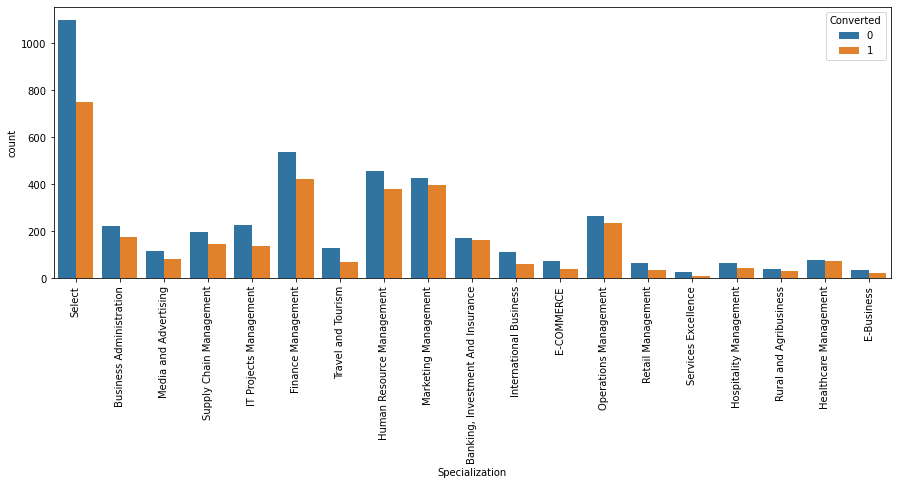

In [31]:
# Let us plot the spread of specialization 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [32]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

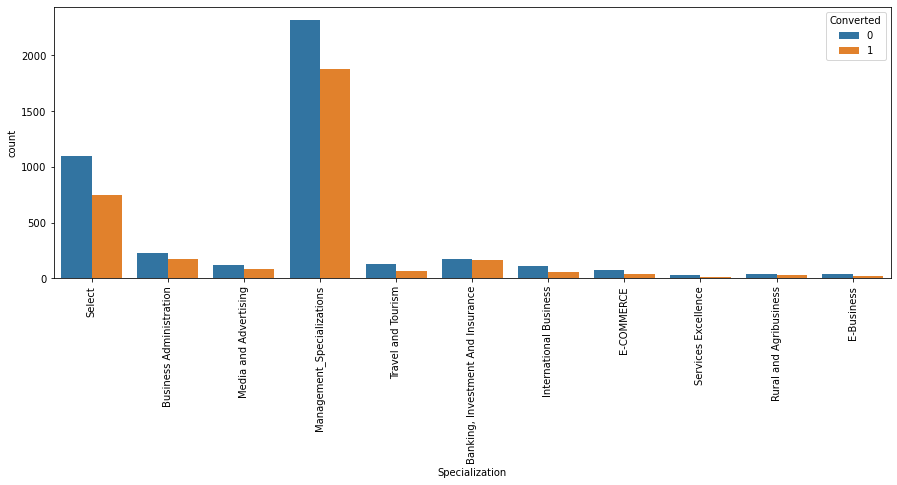

In [33]:
# Let us plot the spread of specialization 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Findings 

- We can see that the management subjects have the highest number of leads generated and converted. 
- The conversion rates of business administration, media and advertising, banking, travel and touris,international business and E-commerce are high

In [34]:
# Let us check the Lead sources 

leads["Lead Source"].value_counts()

Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
blog                    1
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

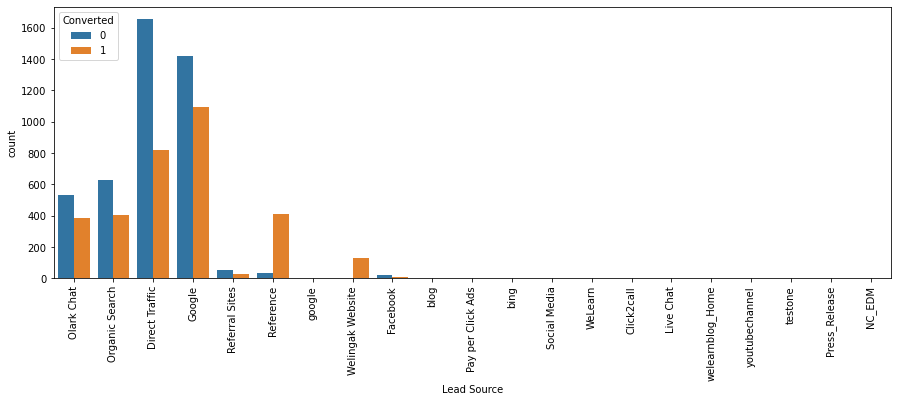

In [35]:
# Let us plot the spread of Lead source and its conversion 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads["Lead Source"], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Findings 

- Both direct traffic and google has the highest number of leads generated and converted compared to other sources. 
- The conversion rates of referral sites. reference, Welingak website and Olark chats are higher.
- In order to improve your conversion, focus on leads from direct traffic, google, referral sites, reference, Welingak website, and Olark chats. 

In [36]:
# Let us check the lead origin and the converted leads 

leads["Lead Origin"].value_counts()

Landing Page Submission    4834
API                        2201
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64

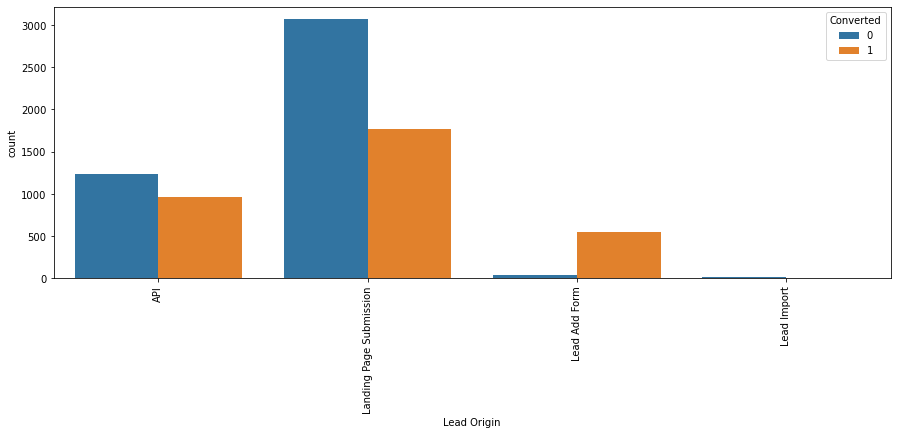

In [37]:
# Let us visualize the relationship between lead origin and converted leads 


plt.figure(figsize=(15,5))
s1=sns.countplot(leads["Lead Origin"], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Findings 

- Landing page submission has the highest number of lead generation and lead conversion. 
- API ranks second in the leads generated and leads converted
- Lead add forms has high leads converted, but its count of leads are not high
- Lead import and quick add forms get very few leads
- Lead add form and API has high conversion rates compared to the landing page submissions 
- To improve total lead conversion rate, focus on API, landing page, submission origin and focus more on generating leads from Lead add form 

In [38]:
# Let us analyze the last activity column 

leads["Last Activity"].value_counts()

Email Opened                    2989
SMS Sent                        2524
Page Visited on Website          566
Olark Chat Conversation          463
Converted to Lead                350
Email Bounced                    257
Email Link Clicked               205
Form Submitted on Website        114
Unreachable                       86
Unsubscribed                      51
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

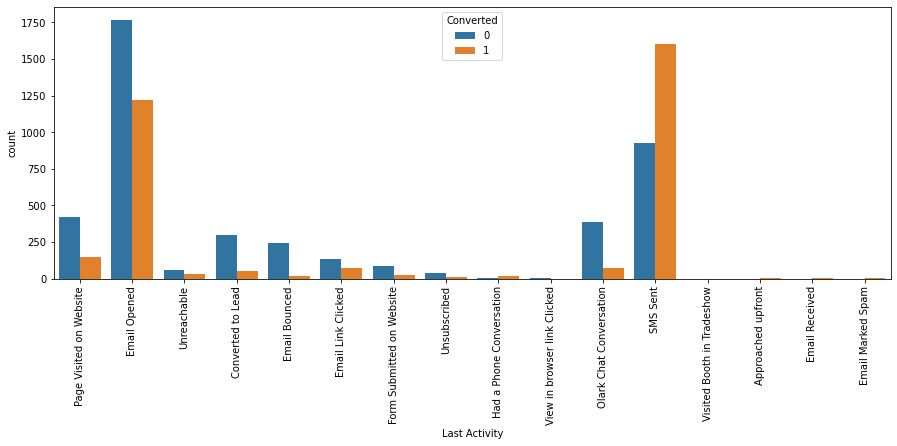

In [39]:
# Let us plot the spread of last activity and see its conversion  

plt.figure(figsize=(15,5))
s1=sns.countplot(leads["Last Activity"], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Findings 

- SMS Sent and email opened has the highest number of conversions
- SMS sent has a better conversion rate compared to any other medium
- The email link clicked, form submitted on the website and page visited on the website too have a decent number of conversions

In [40]:
# Let us analyze do not call and do not email columns 

In [41]:
leads["Do Not Call"].value_counts()

No     7641
Yes       2
Name: Do Not Call, dtype: int64

In [42]:
leads["Do Not Email"].value_counts()

No     7030
Yes     613
Name: Do Not Email, dtype: int64

In [43]:
# Let us analyze the last notable activity columns 

In [44]:
leads["Last Notable Activity"].value_counts()

Modified                        2493
Email Opened                    2481
SMS Sent                        2037
Page Visited on Website          272
Email Link Clicked               129
Olark Chat Conversation           88
Email Bounced                     56
Unsubscribed                      38
Unreachable                       29
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [45]:
# Numerical variable analysis 

In [46]:
# Let us check the percentage of data that has been converted 

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

42.96742116969776

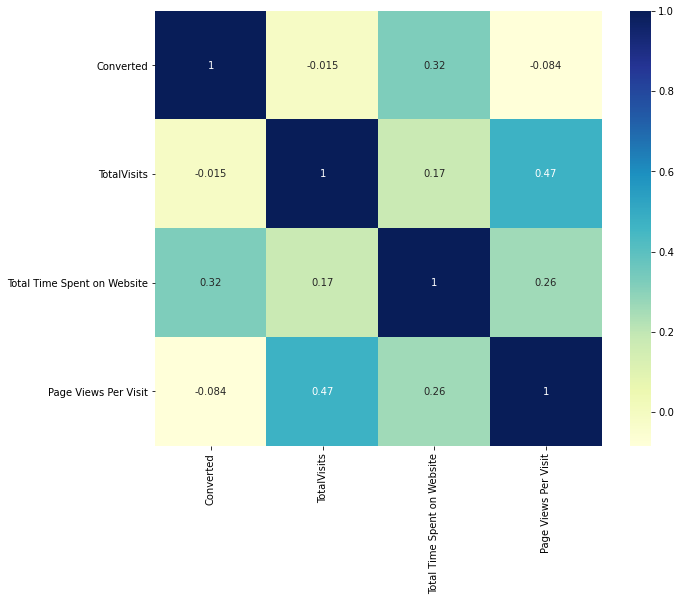

In [47]:
# Let us check the correlation of the numeric values 

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

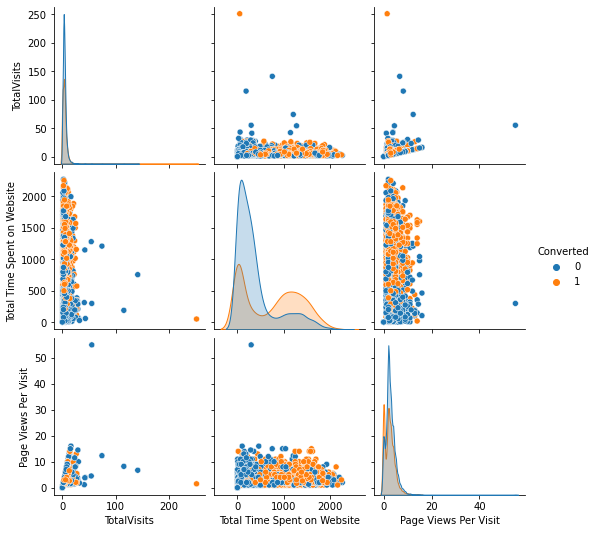

In [48]:
# General visualization of pairplots for the 

sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

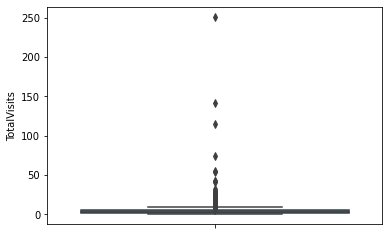

In [49]:
# Let us check the visualization of the variable total visits 

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [50]:
# There are outliers in this total visits column. Let us analyze it further 

In [51]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    7643.000000
mean        3.811723
std         5.088462
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

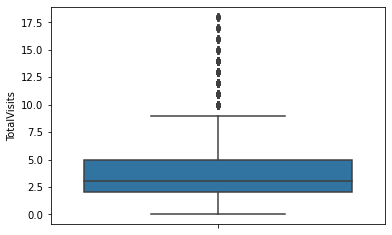

In [52]:
# Let us remove the top and bottom 1% for the column outlier values 

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [53]:
leads.shape

(7580, 18)

In [54]:
# Let us check the Percentiles for the Total time spent on website 


leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    7580.000000
mean      532.330079
std       554.257486
min         0.000000
5%          0.000000
25%        60.000000
50%       295.000000
75%      1008.000000
90%      1411.000000
95%      1581.000000
99%      1846.210000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

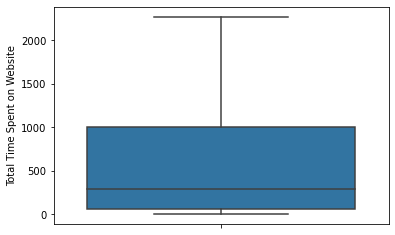

In [55]:
# Now let us visualize the spread of this variable 

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [56]:
# As there is not outliers in this Total time spent on variable, we need not do any outlier treatment here. 

In [57]:
# Let us check the page views per visit variable 

leads['Page Views Per Visit'].describe()

count    7580.000000
mean        2.602388
std         2.050279
min         0.000000
25%         1.330000
50%         2.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

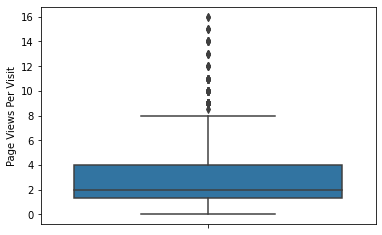

In [58]:
# Let us visualize the spread of page views per visit variable 

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

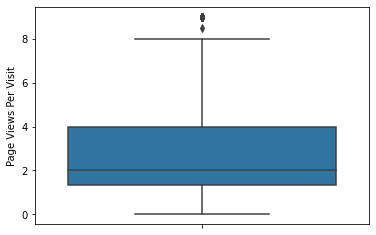

In [59]:
# Outlier treatment: Let us remove the top and bottom 1%

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [60]:
leads.shape

(7516, 18)

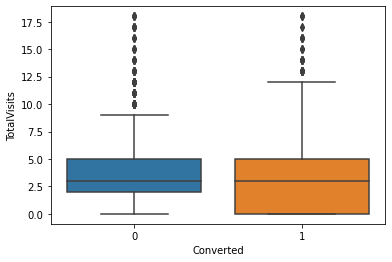

In [61]:
# Let us check the spread of total visits and converted variable 

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

# Findings

- Median for converted and total visits variable are close 
- We cannot conclude anything from this relationship

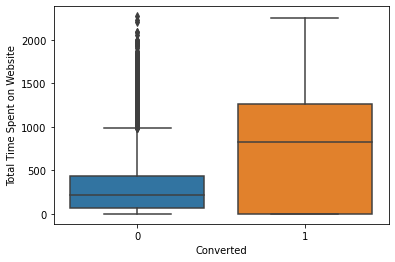

In [62]:
# Checking the spread of total time spent on website and converted 

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

# Findings 

- Leads that spend enough time on the website have greater chances to be converted 
- In order to make leads spend more time, the website should be more engaging

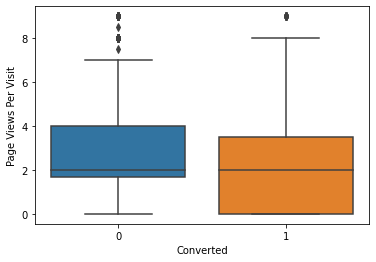

In [63]:
# Let us check the page views per visit and converted variables 

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

# Findings

- The median for converted and unconverted leads is the same
- Nothing can be concluded from this visualization

In [64]:
# Let us finally check if there are any missing values 

leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [65]:
# There are no missing values in this dataframe 

## Dummy variable creation 

In [66]:
# Obtaining the list of categorical columns 

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [67]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [68]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [69]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,0,0,0,0,0,0,0,0,0,0


In [70]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [71]:
leads.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,No,0,0.0,0,0.0,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
1,No,0,5.0,674,2.5,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
2,No,1,2.0,1532,2.0,No,No,No,No,No,...,0,1,0,0,0,0,0,0,0,0
3,No,0,1.0,305,1.0,No,No,No,No,No,...,0,0,0,0,0,0,1,0,0,0
4,No,1,2.0,1428,1.0,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Let us remove some columns like Search, newspaper article, x education forums, newspaper and digital advertisement
# These variables may not help us in the model and evaluation 

leads = leads.drop(["Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Do Not Call"], axis = 1)

In [73]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Step 5: Model Building

In [74]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
leads.shape

(7516, 68)

## Test-train split 

In [76]:
# Import the necessary library for test-train split 

from sklearn.model_selection import train_test_split

In [77]:
# Let us put all feature variables into X apart from the converted variable (the target variable)
# We are dropping the target variable converted and taking the remaining variables in X

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Let us put the target variable converted into y 

y = leads["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# Let us split the model with 70% training set and 30% test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [80]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
5279,2.0,195,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2556,5.0,538,5.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8303,3.0,63,3.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6572,4.0,376,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6360,6.0,267,1.2,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Feature Scaling



#### There are few numeric variables in this dataframe which needs to be scaled 

In [81]:
# Let us import MinMax scaler for scaling the variables 

from sklearn.preprocessing import MinMaxScaler

In [82]:
# Now let us scale the three numeric features present in the dataset 

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
5279,0.111111,0.085827,0.222222,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2556,0.277778,0.236796,0.555556,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8303,0.166667,0.027729,0.333333,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6572,0.222222,0.165493,0.444444,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6360,0.333333,0.117518,0.133333,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Let us look at correlations using a heatmap 

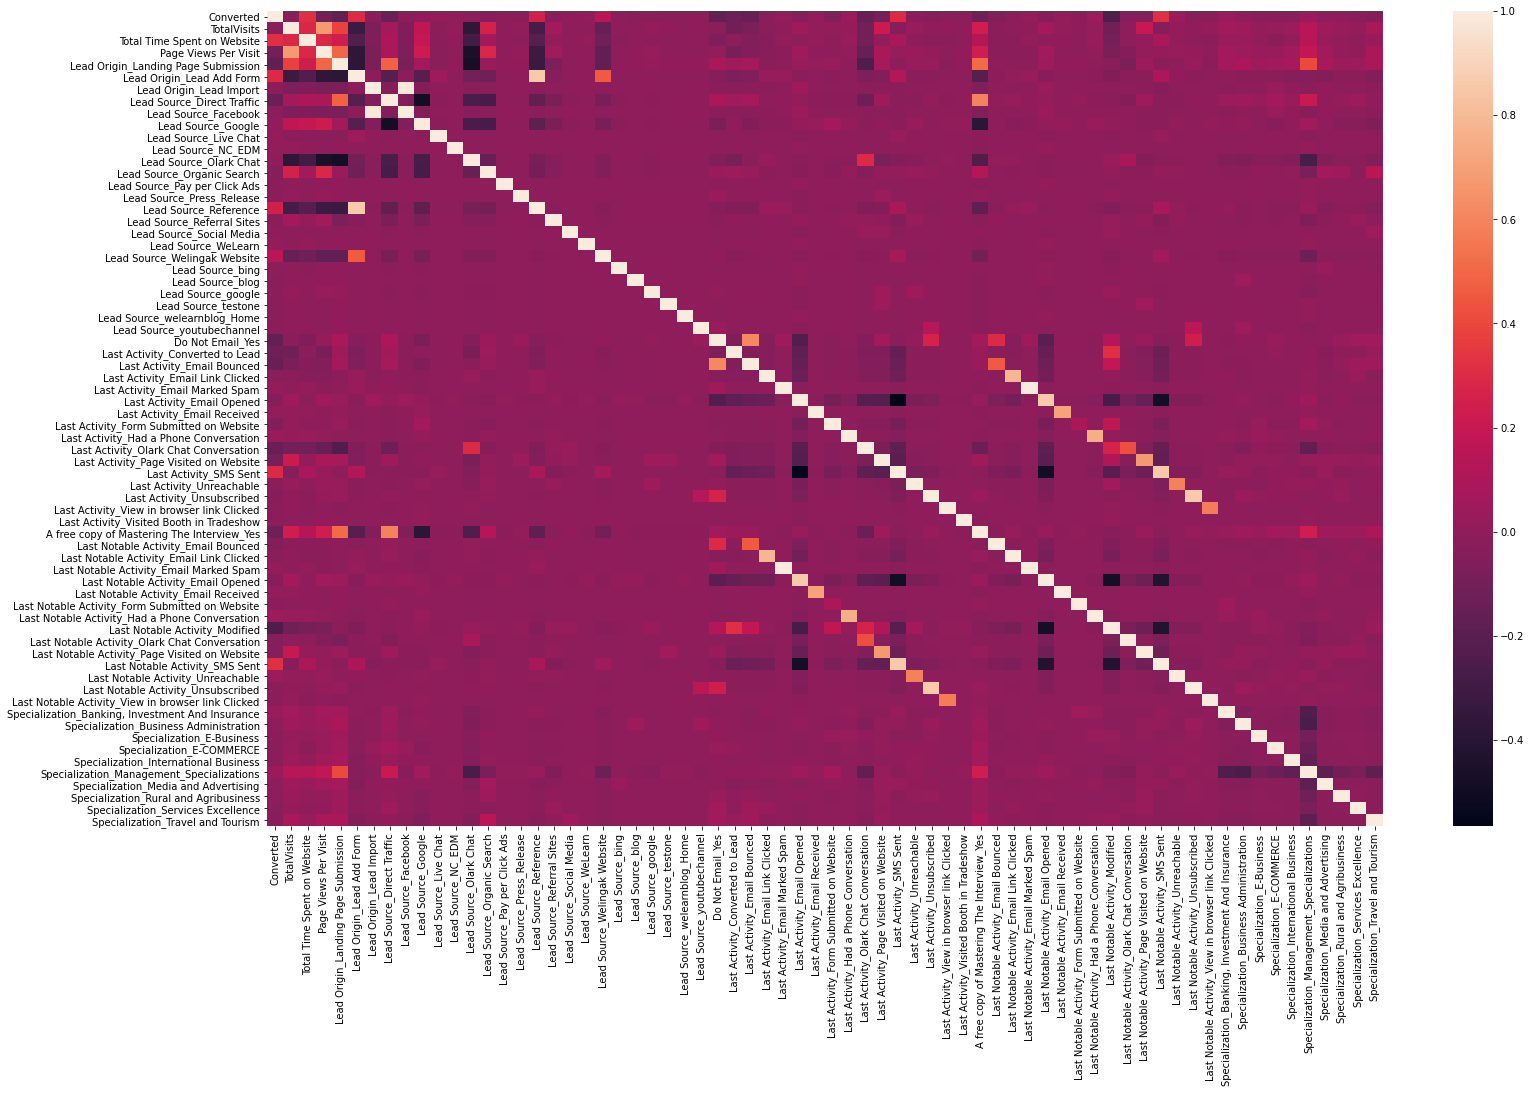

In [83]:
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

## Building the logistics regression model 

There are lot of variables present in this dataframe. It becomes difficult to build and evaluate the model with huge number of variables. Hence, let us use the RFE (Recursive Feature Elimination) method to filter the top 15 variables and then follow a manual elimination method to come up with the right model. 

In [84]:
# Importing logistics regression library and create its object 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [85]:
# Let us import RFE library and see which features are filtered using this method 

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [86]:
# We will have a look at the variables that have been selected by RFE method 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 49),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_blog', False, 25),
 ('Lead Source_google', False, 31),
 ('Lead Source_testone', False, 53),
 ('Lead Source_welearnblog_Home', False, 30),
 ('L

In [87]:
# Let us put all columns that are selected by RFE and put them in variable colt 

colt = X_train.columns[rfe.support_]

In [88]:
colt

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### We have all variables selected by RFE. We will focus on the statistics part now. Now, let us use the p-values and VIF(Variance 

#### Inflation factor) to eliminate features that are not required for this model. 

In [89]:
# Let us select the columns that are filtered by RFE and carry out the model building with it 

X_train = X_train[colt]

In [90]:
# Let us import the statsmodel library for detailed statistical analysis of logistics regression


import statsmodels.api as sm

In [91]:
# We will add a constant on X_train and then build the logistics regression model 

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5261
Model:                            GLM   Df Residuals:                     5245
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2468.6
Date:                Sun, 11 Sep 2022   Deviance:                       4937.1
Time:                        19:01:50   Pearson chi2:                 5.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.1912      0.105    -20.851      0.000      -2.397      -1.985
TotalVisits                                        1.7183      0.282      6.103      0.000       1.167       2.270
Total Time Spent on Website                        4.6678      0.169     27.677      0.000       4.337       4.998
Page Views Per Visit                              -1.0240      0.253     -4.048      0.000      -1.520      -0.528
Lead Origin_Lead Add Form                          1.7373      0.967      1.797      0.072      -0.157       3.632
Lead Source_Olark Chat                             1.6168      0.135     11.994      0.000       1.353       1.881
Lead Source_Reference                              2.6558      0.993      2.674      0.008       0.709       4.603
Lead Source_Welingak Website                       4.6943      1.397      3.361      0.001       1.957       7.432
Do Not Email_Yes                                  -1.3974      0.196     -7.120      0.000      -1.782      -1.013
Last Activity_Email Bounced                       -1.0147      0.469     -2.163      0.031      -1.934      -0.095
Last Activity_Had a Phone Conversation            21.5279   1.14e+04      0.002      0.998   -2.24e+04    2.24e+04
Last Activity_Olark Chat Conversation             -1.2654      0.179     -7.053      0.000      -1.617      -0.914
Last Notable Activity_Email Bounced                1.3847      0.652      2.123      0.034       0.106       2.663
Last Notable Activity_Had a Phone Conversation   -18.2857   1.14e+04     -0.002      0.999   -2.24e+04    2.24e+04
Last Notable Activity_SMS Sent                     1.4010      0.081     17.229      0.000       1.242       1.560
Last Notable Activity_Unreachable                  1.7328      0.619      2.800      0.005       0.520       2.946
==================================================================================================================
"""

#### We can spot a few variables that have p-value of more than 0.05. Let us check the VIF for this too

In [92]:
## Import variance inflation factor (VIF) module 

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [93]:
# Let us build a VIF dataframe for all the variables that we used in this logistics regression model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,57.12
5,Lead Source_Reference,44.01
6,Lead Source_Welingak Website,14.19
2,Page Views Per Visit,4.75
0,TotalVisits,4.34
9,Last Activity_Had a Phone Conversation,3.01
12,Last Notable Activity_Had a Phone Conversation,3.00
1,Total Time Spent on Website,2.02
8,Last Activity_Email Bounced,1.94
7,Do Not Email_Yes,1.72


In [94]:
# Except for the first three variables, the VIF seem to be fine for other variables. 

In [95]:
# Let us remove Lead origin_lead add form as it has high p-value and VIF 

X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)


In [96]:
# Let us refit and rebuild the model with new set of features 

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5261
Model:                            GLM   Df Residuals:                     5246
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.3
Date:                Sun, 11 Sep 2022   Deviance:                       4940.6
Time:                        19:01:51   Pearson chi2:                 5.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.1803      0.105    -20.799      0.000      -2.386      -1.975
TotalVisits                                        1.7168      0.281      6.110      0.000       1.166       2.268
Total Time Spent on Website                        4.6628      0.169     27.669      0.000       4.332       4.993
Page Views Per Visit                              -1.0417      0.253     -4.122      0.000      -1.537      -0.546
Lead Source_Olark Chat                             1.6113      0.135     11.968      0.000       1.347       1.875
Lead Source_Reference                              4.3827      0.257     17.063      0.000       3.879       4.886
Lead Source_Welingak Website                       6.4213      1.015      6.327      0.000       4.432       8.411
Do Not Email_Yes                                  -1.3989      0.196     -7.129      0.000      -1.783      -1.014
Last Activity_Email Bounced                       -1.0184      0.469     -2.171      0.030      -1.938      -0.099
Last Activity_Had a Phone Conversation            21.5238   1.14e+04      0.002      0.998   -2.24e+04    2.24e+04
Last Activity_Olark Chat Conversation             -1.2693      0.179     -7.077      0.000      -1.621      -0.918
Last Notable Activity_Email Bounced                1.3858      0.652      2.124      0.034       0.107       2.664
Last Notable Activity_Had a Phone Conversation   -18.2838   1.14e+04     -0.002      0.999   -2.24e+04    2.24e+04
Last Notable Activity_SMS Sent                     1.4000      0.081     17.220      0.000       1.241       1.559
Last Notable Activity_Unreachable                  1.7311      0.619      2.798      0.005       0.518       2.944
==================================================================================================================
"""

In [97]:
# Let us build the VIF dataframe again

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.75
0,TotalVisits,4.34
8,Last Activity_Had a Phone Conversation,3.01
11,Last Notable Activity_Had a Phone Conversation,3.00
1,Total Time Spent on Website,2.02
7,Last Activity_Email Bounced,1.94
6,Do Not Email_Yes,1.72
12,Last Notable Activity_SMS Sent,1.44
10,Last Notable Activity_Email Bounced,1.30
3,Lead Source_Olark Chat,1.20


In [98]:
# The VIF values are now less than 5. Let us drop the p-values that are high

In [99]:
# Let us drop the variable Last Notable Activity_Had a Phone Conversation

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)


In [100]:
# Let us refit and rebuild the model with new set of features 

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5261
Model:                            GLM   Df Residuals:                     5247
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.5
Date:                Sun, 11 Sep 2022   Deviance:                       4941.0
Time:                        19:01:51   Pearson chi2:                 5.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.1801      0.105    -20.797      0.000      -2.386      -1.975
TotalVisits                                1.7166      0.281      6.109      0.000       1.166       2.267
Total Time Spent on Website                4.6634      0.169     27.673      0.000       4.333       4.994
Page Views Per Visit                      -1.0430      0.253     -4.126      0.000      -1.538      -0.548
Lead Source_Olark Chat                     1.6110      0.135     11.966      0.000       1.347       1.875
Lead Source_Reference                      4.3826      0.257     17.063      0.000       3.879       4.886
Lead Source_Welingak Website               6.4210      1.015      6.326      0.000       4.432       8.410
Do Not Email_Yes                          -1.3989      0.196     -7.129      0.000      -1.783      -1.014
Last Activity_Email Bounced               -1.0186      0.469     -2.172      0.030      -1.938      -0.099
Last Activity_Had a Phone Conversation     3.4714      1.079      3.218      0.001       1.357       5.585
Last Activity_Olark Chat Conversation     -1.2694      0.179     -7.077      0.000      -1.621      -0.918
Last Notable Activity_Email Bounced        1.3860      0.652      2.125      0.034       0.107       2.664
Last Notable Activity_SMS Sent             1.4001      0.081     17.220      0.000       1.241       1.559
Last Notable Activity_Unreachable          1.7313      0.619      2.798      0.005       0.518       2.944
==========================================================================================================
"""

In [101]:
# Let us finally check the VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.75
0,TotalVisits,4.34
1,Total Time Spent on Website,2.02
7,Last Activity_Email Bounced,1.94
6,Do Not Email_Yes,1.72
11,Last Notable Activity_SMS Sent,1.44
10,Last Notable Activity_Email Bounced,1.30
3,Lead Source_Olark Chat,1.20
9,Last Activity_Olark Chat Conversation,1.19
4,Lead Source_Reference,1.06


#### Now both p-values and VIF are decent enough and within limits for the model. Let's jump into evaluation

# Step 6: Model Evaluation 

In [102]:
# Let us predict the probabilities of the train set with the help of predict function

y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

5279    0.014213
2556    0.555653
8303    0.028912
6572    0.183626
6360    0.548489
1173    0.137521
6249    0.718182
6896    0.105898
7772    0.324689
2467    0.360227
dtype: float64

In [103]:
# Now we will reshape it into an array 

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01421252, 0.55565277, 0.02891248, 0.18362641, 0.5484886 ,
       0.13752088, 0.71818218, 0.10589845, 0.32468915, 0.36022682])

## Creating a new dataframe with actual conversions and predicted probabilities for the model 

In [104]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.014213
1,1,0.555653
2,0,0.028912
3,0,0.183626
4,1,0.548489


### Create a new column Predicted with 1, if Paid_Prob > 0.5. Else 0

In [105]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the dataframe now
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.014213,0
1,1,0.555653,1
2,0,0.028912,0
3,0,0.183626,0
4,1,0.548489,1


#### Now we have the predicted and conversion probability measures. Let us evaluate this model 

In [106]:
# Importing metrics from sklearn for model evaluation

from sklearn import metrics

In [107]:
# Let us create a confusion matrix now 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2554  444]
 [ 716 1547]]


In [108]:
# Predicted     not_conver    conver
# Actual
# not_conver        2554      444
# conver            716       1547  

In [109]:
# Let us check the overall accuracy of this model 

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.7795095989355636


In [110]:
# Now let us evaluate other important metrics 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let us calculate the sensitivity 

TP/(TP+FN)

0.6836058329650906

In [112]:
# Let us calculate the specificity 

TN/(TN+FP)


0.8519012675116745

### Find the optimal cutoff point to decide if the predicted lead is converted or not

We used the arbitrary cutoff for the predicting the probability and loosely check the model performance. We must optimize the threshold value for good results.

In [113]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


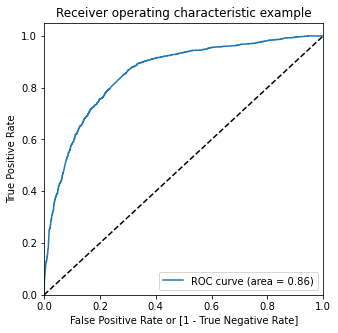

In [115]:
# Calling the ROC function 

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


#### The area under ROC curve is 0.86, which shows that the model we built is quite good. 

#### Let us check the sensitivity and specificity tradeoff to find the optimal threshold value 

In [116]:
# We will first create the columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014213,0,1,0,0,0,0,0,0,0,0,0
1,1,0.555653,1,1,1,1,1,1,1,0,0,0,0
2,0,0.028912,0,1,0,0,0,0,0,0,0,0,0
3,0,0.183626,0,1,1,0,0,0,0,0,0,0,0
4,1,0.548489,1,1,1,1,1,1,1,0,0,0,0


In [117]:
# Let us now find out the accuracy, sensitivity and specificity for different probability cutoff points 

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.430146  1.000000  0.000000
0.1   0.1  0.504467  0.992046  0.136424
0.2   0.2  0.721346  0.920460  0.571047
0.3   0.3  0.762593  0.888202  0.667779
0.4   0.4  0.778369  0.764914  0.788526
0.5   0.5  0.779510  0.683606  0.851901
0.6   0.6  0.768865  0.607601  0.890594
0.7   0.7  0.734081  0.471498  0.932288
0.8   0.8  0.705569  0.366770  0.961308
0.9   0.9  0.664512  0.243040  0.982655


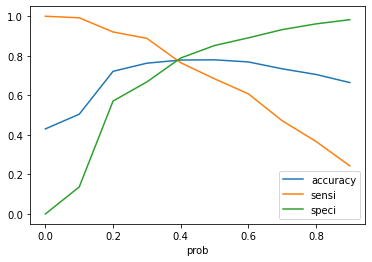

In [118]:
# Let us plot these points 

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# Findings 


- We can see that around 0.42, we get the optimal cutoff point where all these measures intersect
- Also, we can see that at point of 0.4, the accuracy, sensitivity and specificity are almost nearby and similar 
- Let us decide the optimal cutoff point for probability as 0.42 

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.014213,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.555653,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.028912,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.183626,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.548489,1,1,1,1,1,1,1,0,0,0,0,1


In [120]:
# Let us check the accuracy now 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7810302223911804

In [121]:
# We will create the confusion matrix once again 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2408,  590],
       [ 562, 1701]], dtype=int64)

In [122]:
# Now we will evaluate other metrics too 

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Sensitivity for the model 

TP/(TP+FN)

0.7516570923552806

In [124]:
# Specificity of the model 

TN/(TN+FP)


0.8032021347565044

In [ ]:
# These cutoff points are good to go for this model. 

# Evaluation metrics for the train data 0.42 cutoff

- Accuracy - 78.1%
- Sensitivity - 75.1%
- Specificity - 80.3%

# Step 7: Making predictions on the test set 

In [ ]:
# Now let us make predictions on the test set. Before that we will scale the values 

In [125]:
# We will scale the test set with transform 

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [126]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
6505,0.055556,0.247359,0.111111,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8954,0.222222,0.170335,0.147778,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2153,0.166667,0.605634,0.333333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2599,0.111111,0.113556,0.222222,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3665,0.166667,0.557218,0.333333,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
# Let us select the columns in X_test 

X_test = X_test[colt]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
6505,0.055556,0.247359,0.111111,0,0,0,0,0,0,0,0,0,0,0,0
8954,0.222222,0.170335,0.147778,0,0,0,0,0,0,0,0,0,0,1,0
2153,0.166667,0.605634,0.333333,0,0,0,0,0,0,0,0,0,0,1,0
2599,0.111111,0.113556,0.222222,0,0,0,0,0,0,0,0,0,0,0,0
3665,0.166667,0.557218,0.333333,0,0,0,0,0,0,0,0,0,0,1,0


In [128]:
# Adding a constant to X_test 

X_test_sm = sm.add_constant(X_test[colt])


In [129]:
# Checking X_test_sm 

X_test_sm


,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
6505,1.0,0.055556,0.247359,0.111111,0,0,0,0,0,0,0,0,0,0,0,0
8954,1.0,0.222222,0.170335,0.147778,0,0,0,0,0,0,0,0,0,0,1,0
2153,1.0,0.166667,0.605634,0.333333,0,0,0,0,0,0,0,0,0,0,1,0
2599,1.0,0.111111,0.113556,0.222222,0,0,0,0,0,0,0,0,0,0,0,0
3665,1.0,0.166667,0.557218,0.333333,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
5748,1.0,0.277778,0.040933,0.555556,0,0,0,0,0,0,0,0,0,0,1,0
1398,1.0,0.111111,0.281690,0.111111,0,0,0,0,0,0,0,0,0,0,0,0
4578,1.0,0.222222,0.929137,0.444444,0,0,0,0,0,0,0,0,0,0,1,0


In [130]:
# Let us drop the variables Lead_source reference and last_notable activity_had_a_phone conversation columns 

X_test.drop(['Lead Source_Reference','Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [132]:
# Make predictions on the test set and store them on the variable y_test_pred 

y_test_pred = res.predict(sm.add_constant(X_test_sm))


In [133]:
y_test_pred[:10]


6505    0.258285
8954    0.558577
2153    0.878877
2599    0.154755
3665    0.852688
6938    0.299267
5928    0.137080
8318    0.354616
2379    0.138816
7003    0.695637
dtype: float64

In [134]:
# Let us conver the y_pred to a dataframe 

y_pred_1 = pd.DataFrame(y_test_pred)


In [135]:
y_pred_1.head()

,0
6505,0.258285
8954,0.558577
2153,0.878877
2599,0.154755
3665,0.852688


In [136]:
# Let us convert the y_test to dataframe 

y_test_df = pd.DataFrame(y_test)


In [137]:
# Let us remove the index for both these dataframes and append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# Let us append y_pred_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [139]:
y_pred_final.head()

,Converted,0
0,0,0.258285
1,0,0.558577
2,1,0.878877
3,0,0.154755
4,1,0.852688


In [140]:
# Now let us rename its columns 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [141]:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.258285
1,0,0.558577
2,1,0.878877
3,0,0.154755
4,1,0.852688


In [142]:
# Let us make predictions on the test set with 0.42 as the cutoff point 

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [143]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.258285,0
1,0,0.558577,1
2,1,0.878877,1
3,0,0.154755,0
4,1,0.852688,1


In [144]:
# Let us check the overall accuracy 

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7738359201773836

In [145]:
# Building the confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1015,  277],
       [ 233,  730]], dtype=int64)

In [146]:
# Calculating other metrics 

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Calculate the sensitivity 

TP / float(TP+FN)


0.7580477673935618

In [148]:
# Calculate the specificity 

TN / float(TN+FP)


0.7856037151702786

# Evaluation metrics for the test data at 0.42 cutoff 

- Accuracy - 77.3% 
- Sensitivity - 75.8%
- Specificity - 78.5%

# Train and test data comparison for evaluation metrics at 0.42 cut off using sensitivity and specificity 



# Evaluation metrics for the "train data" at 0.42 cutoff

- Accuracy - 78.1%
- Sensitivity - 75.1%
- Specificity - 80.3%


# Evaluation metrics for the "test data" at 0.42 cutoff 

- Accuracy - 77.3% 
- Sensitivity - 75.8%
- Specificity - 78.5%

## Precision and recall tradeoff 

In [149]:
# Importing the precision recall curve 

from sklearn.metrics import precision_recall_curve

In [150]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 5256    0
 5257    0
 5258    0
 5259    1
 5260    0
 Name: Converted, Length: 5261, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 5256    1
 5257    0
 5258    0
 5259    1
 5260    0
 Name: Predicted, Length: 5261, dtype: int64)

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


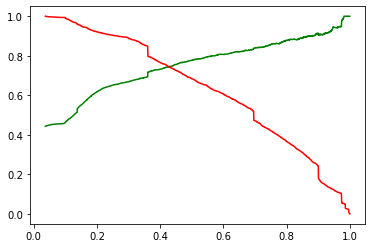

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [153]:
# Let us predict the probability with 0.44 as the cutoff point 

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.014213,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.555653,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.028912,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.183626,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.548489,1,1,1,1,1,1,1,0,0,0,0,1


In [154]:
# Finding the accuracy 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.780269910663372

In [155]:
# Let us build the confusion matrix again 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2442,  556],
       [ 600, 1663]], dtype=int64)

In [156]:
# Let us evaluate other metrics as well 

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Calculating the precision 

TP/(TP+FP)


0.7494366831906264

In [158]:
# Calculating the recall

TP/(TP+FN)


0.7348652231551038

In [ ]:
# This cutoff point seems good for this model 

# Evaluation metrics for the training data at 0.44 cutoff using precision recall trade off

- Accuracy - 78.0%
- Precision - 74.9%
- Recall - 73.4%

## Let us make predictions on the test set again with this new cut off 0.44

In [161]:
# Now make predictions on the test set and store it in y_test_pred

y_test_pred = res.predict(X_test_sm)


In [162]:
y_test_pred.head()

6505    0.258285
8954    0.558577
2153    0.878877
2599    0.154755
3665    0.852688
dtype: float64

In [163]:
# Let us conver y_pred to dataframe 

y_pred_1 = pd.DataFrame(y_test_pred)


In [164]:
y_pred_1.head()

,0
6505,0.258285
8954,0.558577
2153,0.878877
2599,0.154755
3665,0.852688


In [165]:
# Converting y_test to a dataframe 

y_test_df = pd.DataFrame(y_test)


In [166]:
# Let us remove the index for both these dataframe and append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Apped the y_test_df and y_pred_1 dataframes 

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [168]:
y_pred_final.head()

,Converted,0
0,0,0.258285
1,0,0.558577
2,1,0.878877
3,0,0.154755
4,1,0.852688


In [169]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [170]:
y_pred_final.head()


,Converted,Conversion_Prob
0,0,0.258285
1,0,0.558577
2,1,0.878877
3,0,0.154755
4,1,0.852688


In [171]:
# Let us make predictions on the test set using 0.44 as the probability cut off

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)


In [172]:
y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,0,0.258285,0
1,0,0.558577,1
2,1,0.878877,1
3,0,0.154755,0
4,1,0.852688,1


In [173]:
# Calculating the overall accuracy 

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7738359201773836

In [174]:
# Building the confusion matrix on the test set 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1029,  263],
       [ 247,  716]], dtype=int64)

In [175]:
# Evaluating other metrics 

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Calculating the precision 

TP/(TP+FP)


0.7313585291113381

In [177]:
# Calculating recall 

TP/(TP+FN)

0.7435098650051921

# Evaluation metrics for the test data at 0.44 cutoff for the precision recall trade off 

- Accuracy - 77.3%
- Precision - 73.1%
- Recall - 74.3% 

# Comparison of Train and test data evaluation metrics for 0.44 cutoff found using precision recall trade off

# Evaluation metrics for the "training data" at 0.44 cutoff using precision recall trade off

- Accuracy - 78.0%
- Precision - 74.9%
- Recall - 73.4%



# Evaluation metrics for the "test data" at 0.44 cutoff for the precision recall trade off 

- Accuracy - 77.3%
- Precision - 73.1%
- Recall - 74.3% 

# Train and test data comparison for evaluation metrics at 0.42 cut off using sensitivity and specificity 



# Evaluation metrics for the "train data" at 0.42 cutoff

- Accuracy - 78.1%
- Sensitivity - 75.1%
- Specificity - 80.3%


# Evaluation metrics for the "test data" at 0.42 cutoff 

- Accuracy - 77.3% 
- Sensitivity - 75.8%
- Specificity - 78.5%

### The model seems to be quite good and the CEO can use this to predict the hot leads generated during the campaigns

# Conclusion 

### Findings from the model building and evaluation 

Here are the crucial variables that were found to contribute to leads converting for your education course products. 


- The total time spent on website 
- The total number of visits
- Lead sources like google, direct traffic, organic search and Welingkar website
- Last activity from SMS and Olark chats
- Lead origin is from Lead add format

Focusing and improving on these variables, X education can improve their lead conversion rates and improve their sales. 

